In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Getting data


In [13]:
df = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/TCHOL_J.XPT')

Taking sequence number, the id number for the observation, and the total cholesterol measured in mg/dl

In [14]:
df.drop('LBDTCSI',axis=1,inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6738 entries, 0 to 7434
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    6738 non-null   float64
 1   LBXTC   6738 non-null   float64
dtypes: float64(2)
memory usage: 157.9 KB


As we are interested in patients 20 or older, we are filtering for age.

In [15]:
demo = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DEMO_J.XPT')

In [16]:
demo_merged = demo.merge(df,on='SEQN',how='right')


In [17]:
demo_merged= demo_merged[demo_merged.RIDAGEYR>=20].copy()
demo_merged.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,LBXTC
0,93705.0,10.0,2.0,2.0,66.0,NaN,4.0,4.0,2.0,NaN,...,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82,157.0
3,93708.0,10.0,2.0,2.0,66.0,NaN,5.0,6.0,2.0,NaN,...,1.0,1.0,13329.450589,14372.488765,2.0,138.0,6.0,6.0,1.63,209.0
4,93709.0,10.0,2.0,2.0,75.0,NaN,4.0,4.0,1.0,NaN,...,2.0,NaN,12043.388271,12277.556662,1.0,136.0,2.0,2.0,0.41,176.0
5,93711.0,10.0,2.0,1.0,56.0,NaN,5.0,6.0,2.0,NaN,...,1.0,3.0,11178.260106,12390.919724,2.0,134.0,15.0,15.0,5.00,238.0
7,93713.0,10.0,2.0,1.0,67.0,NaN,3.0,3.0,1.0,NaN,...,2.0,NaN,174806.575152,166841.660681,1.0,140.0,6.0,6.0,2.65,184.0


In [18]:
df = demo_merged[['SEQN','LBXTC']].copy()
df.head()

,SEQN,LBXTC
0,93705.0,157.0
3,93708.0,209.0
4,93709.0,176.0
5,93711.0,238.0
7,93713.0,184.0


As it is recommended to fast for 9 to 12 hours before getting cholesterol measured, we are filtering for those who fasted at least 9 hours.

In [19]:
fasting = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/FASTQX_J.XPT')
fasting_merged = df.merge(fasting[fasting.PHAFSTHR >= 9], on='SEQN',how='inner')
df = fasting_merged[['SEQN','LBXTC']].copy()
df.head()

,SEQN,LBXTC
0,93708.0,209.0
1,93711.0,238.0
2,93713.0,184.0
3,93715.0,180.0
4,93717.0,213.0


# EDA

## Distribution of total cholesterol

<AxesSubplot:>

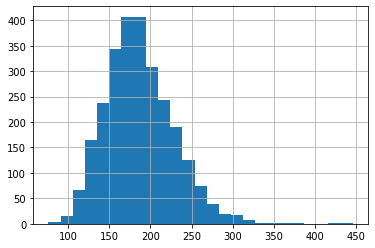

In [9]:
df.LBXTC.hist(bins=25)

The distribution of total cholesterol looks normal but right skewed.  There are some extreme values above 400.

# Exploring demographic data in relation to total cholesterol

In [10]:
demo_merged.corr()['LBXTC'].sort_values()

RIDEXPRG   -0.097854
SDMVPSU    -0.086771
DMDHHSZA   -0.043433
RIDEXMON   -0.041857
DMDHHSZE   -0.031607
MIAINTRP   -0.020787
DMDHRMAZ   -0.020375
SIAINTRP   -0.017760
DMDMARTL   -0.016780
DMDHHSIZ   -0.016450
DMDFMSIZ   -0.007298
SDMVSTRA   -0.005437
SEQN       -0.002398
INDHHIN2   -0.001406
DMQADFC     0.000745
INDFMIN2    0.001280
FIAINTRP    0.003044
DMDYRSUS    0.006794
DMDHHSZB    0.010582
DMDHREDZ    0.011015
DMDHRAGZ    0.012087
RIDRETH1    0.012357
RIDRETH3    0.019720
WTMEC2YR    0.019866
FIALANG     0.020708
DMDEDUC2    0.024758
WTINT2YR    0.025337
DMDCITZN    0.025884
DMDHRGND    0.026441
FIAPROXY    0.030869
SIAPROXY    0.033639
MIAPROXY    0.035220
MIALANG     0.037110
SIALANG     0.038495
INDFMPIR    0.042540
DMDBORN4    0.043806
AIALANGA    0.046639
RIDAGEYR    0.052039
DMDHSEDZ    0.056316
DMQMILIZ    0.064595
RIAGENDR    0.090433
LBXTC       1.000000
SDDSRVYR         NaN
RIDSTATR         NaN
RIDAGEMN         NaN
RIDEXAGM         NaN
DMDEDUC3         NaN
Name: LBXTC, 

There is not much correlation between any of the demographic variables and total cholesterol

## Gender

<AxesSubplot:xlabel='RIAGENDR', ylabel='LBXTC'>

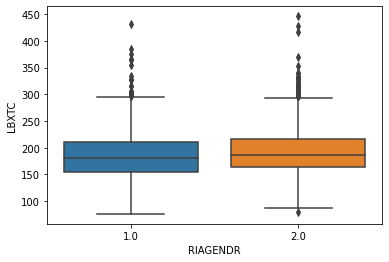

In [11]:
sns.boxplot(x='RIAGENDR', y='LBXTC', data=demo_merged)

The boxplots are relatively similar with respect to gender.  

## Race

<AxesSubplot:xlabel='RIDRETH3', ylabel='LBXTC'>

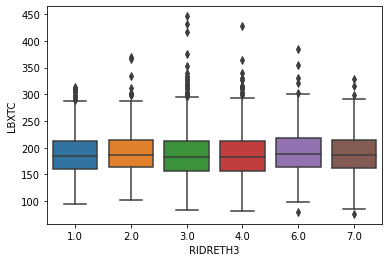

In [12]:
sns.boxplot(x='RIDRETH3', y='LBXTC', data=demo_merged)


The boxplots again are relatively similar.  However non-Hispanic whites (3.0) have many outliers at a higher total cholesterol level.

## Age

<AxesSubplot:xlabel='RIDAGEYR', ylabel='LBXTC'>

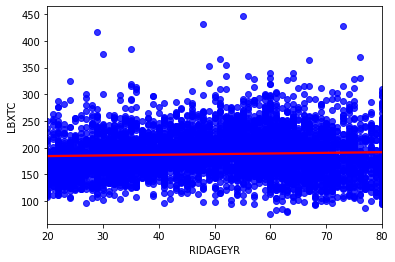

In [13]:
sns.regplot(x='RIDAGEYR',  y='LBXTC', data=demo_merged, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

As you can see there is not much of a linear relationship between age and total cholesterol. 


The demographic data included more variables involving information such as educational level and military status.  These are not going to be explored.  To see a complete list of all the data in the demographics file see https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DEMO_J.htm

Exploring age of individuals with total cholesterol over 200

In [15]:
cholage = demo_merged[['RIDAGEYR','LBXTC']][demo_merged.LBXTC > 200].copy()

In [16]:
cholage['decade']=np.floor(cholage['RIDAGEYR']/10)*10

<AxesSubplot:xlabel='decade', ylabel='count'>

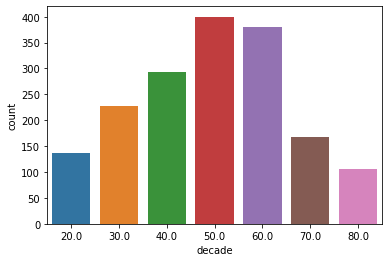

In [18]:
sns.countplot(x='decade',data=cholage)

High cholesterol can occur at any age but is most prominent with people in their fifties

## BMI and cholesterol and other body measures

In [14]:
body_df = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/BMX_J.XPT')
body_df = body_df.merge(df,on='SEQN',how='right')
body_df.head()

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,...,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP,LBXTC
0,93708.0,1.0,53.5,NaN,NaN,NaN,NaN,NaN,150.2,NaN,...,NaN,30.6,NaN,27.4,NaN,88.2,NaN,90.1,NaN,209.0
1,93711.0,1.0,62.1,NaN,NaN,NaN,NaN,NaN,170.6,NaN,...,NaN,37.2,NaN,30.8,NaN,86.6,NaN,90.7,NaN,238.0
2,93713.0,1.0,74.9,NaN,NaN,NaN,NaN,NaN,178.6,NaN,...,NaN,41.4,NaN,30.6,NaN,99.7,NaN,91.0,NaN,184.0
3,93715.0,1.0,65.6,NaN,NaN,NaN,NaN,NaN,170.6,NaN,...,NaN,39.3,NaN,30.8,NaN,89.7,NaN,93.1,NaN,180.0
4,93717.0,1.0,74.4,NaN,NaN,NaN,NaN,NaN,174.1,NaN,...,NaN,41.4,NaN,29.9,NaN,86.2,NaN,91.8,NaN,213.0


In [15]:
body_df.corr()['LBXTC'].sort_values()

BMXHT      -0.073546
BMDSTATS   -0.065437
BMXLEG     -0.058648
BMXWT      -0.053373
BMXARML    -0.052694
BMXHIP     -0.032892
BMXWAIST   -0.027828
BMXBMI     -0.025491
BMXARMC    -0.024070
SEQN       -0.010141
BMIWT       0.027600
BMIHT       0.294650
LBXTC       1.000000
BMXRECUM         NaN
BMIRECUM         NaN
BMXHEAD          NaN
BMIHEAD          NaN
BMILEG           NaN
BMIARML          NaN
BMIARMC          NaN
BMIWAIST         NaN
BMIHIP           NaN
Name: LBXTC, dtype: float64

As with demographic data there appears to be no strong correlation with body measures and total cholesterol.

##  Compairing height, weight, bmi, and total cholesterol

<AxesSubplot:xlabel='BMXWT', ylabel='LBXTC'>

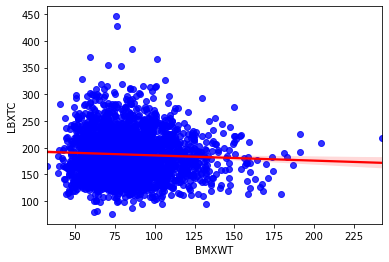

In [16]:
sns.regplot(x='BMXWT',  y='LBXTC', data=body_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

As can be seen there is not much correlation between weight and cholesterol level.

<AxesSubplot:xlabel='BMXHT', ylabel='LBXTC'>

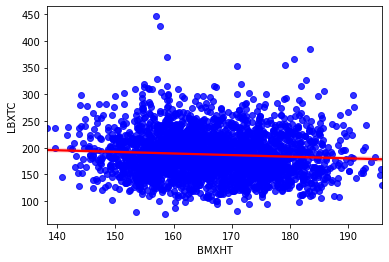

In [17]:
sns.regplot(x='BMXHT',  y='LBXTC', data=body_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

As height increases, total cholesterol slightly decreases.

<AxesSubplot:xlabel='BMXBMI', ylabel='LBXTC'>

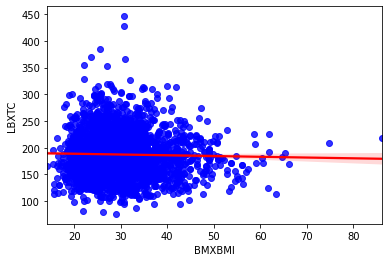

In [18]:
sns.regplot(x='BMXBMI',  y='LBXTC', data=body_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

There doesn't appear to be much correlation between body mass index and total cholesterol.  All three replots do show outliers.

<AxesSubplot:xlabel='BMXWAIST', ylabel='LBXTC'>

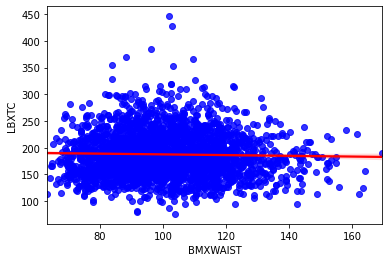

In [19]:
sns.regplot(x='BMXWAIST',  y='LBXTC', data=body_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

Again there isn't much correlation between waist circumference and total cholesterol level.

## Examining blood pressure and pulse with respect to total cholesterol

In [20]:
bp_df = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/BPX_J.XPT')
bp_df = bp_df.merge(df,on='SEQN',how='right')
bp_df.head()

,SEQN,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,...,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4,LBXTC
0,93708.0,NaN,NaN,1.0,3.0,68.0,1.0,1.0,170.0,NaN,...,138.0,78.0,2.0,144.0,76.0,2.0,144.0,74.0,2.0,209.0
1,93711.0,NaN,NaN,1.0,4.0,62.0,1.0,1.0,130.0,108.0,...,94.0,68.0,2.0,102.0,64.0,2.0,NaN,NaN,NaN,238.0
2,93713.0,NaN,NaN,1.0,4.0,90.0,1.0,1.0,130.0,104.0,...,104.0,74.0,2.0,106.0,72.0,2.0,NaN,NaN,NaN,184.0
3,93715.0,NaN,NaN,1.0,3.0,66.0,1.0,1.0,150.0,112.0,...,112.0,58.0,2.0,118.0,60.0,2.0,NaN,NaN,NaN,180.0
4,93717.0,NaN,NaN,1.0,3.0,60.0,1.0,1.0,140.0,116.0,...,124.0,66.0,2.0,116.0,68.0,1.0,NaN,NaN,NaN,213.0


In [21]:
bp_df.corr()['LBXTC'].sort_values()

BPAEN4     -0.091418
PEASCCT1   -0.084177
BPXPULS    -0.070839
BPXPTY     -0.025535
BPAEN3     -0.018620
BPACSZ     -0.017007
BPAEN2     -0.011996
SEQN       -0.010141
BPAARM     -0.003210
BPXPLS      0.031864
BPXSY4      0.101131
BPXML1      0.105191
BPXSY3      0.116763
BPXSY2      0.120595
BPXSY1      0.126626
BPXDI1      0.144354
BPXDI3      0.147145
BPXDI2      0.148131
BPXDI4      0.189845
LBXTC       1.000000
BPXCHR           NaN
BPAEN1           NaN
Name: LBXTC, dtype: float64

No large correlation can be seen

For systolic and diastolic readings there were up to 4 readings taken.  I am going to average all 4 into 1 systolic and 1 diastolic reading.

In [22]:
bp_df['Systolic'] = bp_df[['BPXSY1','BPXSY2','BPXSY3','BPXSY4']].mean(axis=1)
bp_df["Diastolic"] = bp_df[['BPXDI1','BPXDI2','BPXDI3','BPXDI4']].mean(axis=1)

<AxesSubplot:xlabel='Systolic', ylabel='LBXTC'>

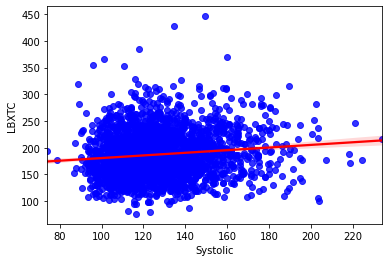

In [23]:
sns.regplot(x='Systolic',  y='LBXTC', data=bp_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

As systolic levels rise, total cholesterol slightly rises.

<AxesSubplot:xlabel='Diastolic', ylabel='LBXTC'>

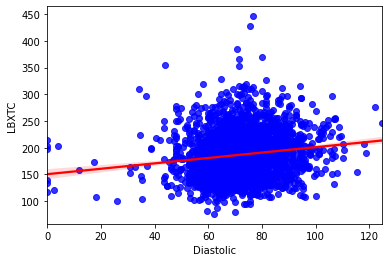

In [24]:
sns.regplot(x='Diastolic',  y='LBXTC', data=bp_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

The same can be seen with diastolic levels, as the levels rise, total cholesterol slightly rises.  Looking at the distributions of systolic and diastolic variables...

<AxesSubplot:>

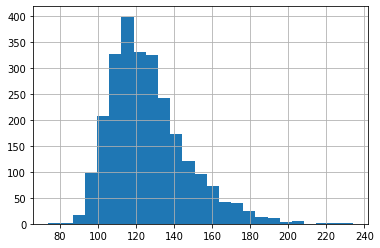

In [25]:
bp_df.Systolic.hist(bins=25)

The distribution is right skewed with some extreme outliers above 225.

<AxesSubplot:>

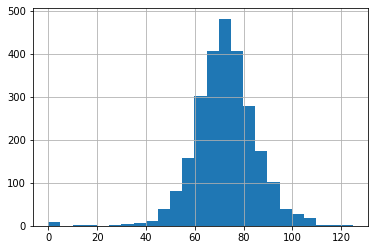

In [26]:
bp_df.Diastolic.hist(bins=25)

The diastolic distribution appears more normal.  Values of 0 are more than likely missing values.

Looking at pulse...

<AxesSubplot:xlabel='BPXPLS', ylabel='LBXTC'>

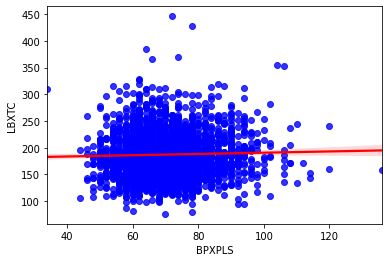

In [27]:
sns.regplot(x='BPXPLS',  y='LBXTC', data=bp_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

There doesn't appear to be much relation between resting pulse and total cholesterol level.  Looking at wether or not the pulse is irregular.

<AxesSubplot:xlabel='BPXPULS', ylabel='LBXTC'>

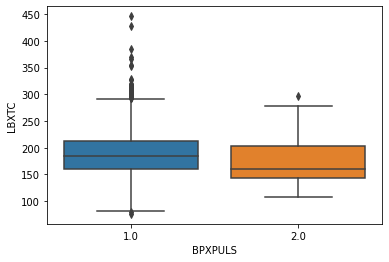

In [28]:
sns.boxplot(x='BPXPULS',  y='LBXTC', data=bp_df)

It is interesting that those with a regular pulse (1) have slightly higher total cholesterol levels than those with an irregular pulse.  Maybe those with an irregular pulse are on medication that also controls cholesterol.

## Dietary data -- diet habits

In [20]:
diet1 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DR1TOT_J.XPT')
diet1_merged = diet1.merge(df,on='SEQN',how='right')
diet2 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DR2TOT_J.XPT')
diet2_merged = diet2.merge(df,on='SEQN',how='right')

In [21]:
diet = diet1.merge(diet2, on='SEQN', how="inner")

In [22]:
(diet.isnull().sum()/diet.shape[0]).sort_values(ascending=False)

DRQSDT5     0.999770
DRQSDT6     0.999540
DRD370PQ    0.999311
DRD370JQ    0.999196
DRQSDT12    0.998851
              ...   
DR1DRSTZ    0.000000
WTDRD1_x    0.000000
DR2DRSTZ    0.000000
WTDRD1_y    0.000000
SEQN        0.000000
Length: 252, dtype: float64

In [23]:
diet.loc[diet.DBQ095Z==4,'DBD100']=0

In [24]:
diet = diet.merge(df,on='SEQN',how='right')

<AxesSubplot:xlabel='DBD100', ylabel='LBXTC'>

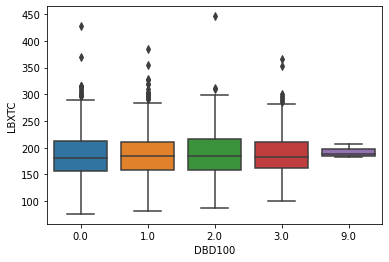

In [25]:
sns.boxplot(x='DBD100', y='LBXTC', data=diet)

The medians of cholesterol are similar no matter how often salt is used.  However the largest outliers are with those that use salt very often. Looking at those who know their salt intake

<AxesSubplot:xlabel='DBD100', ylabel='LBXTC'>

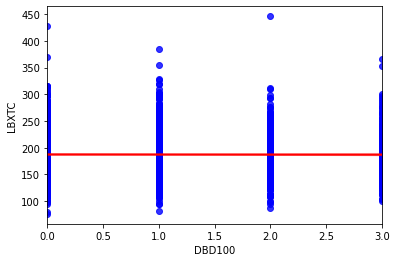

In [15]:
sns.regplot(x='DBD100',  y='LBXTC', data=diet[diet.DBD100<=3], scatter_kws={"color": "blue"}, line_kws={"color": "red"})

Again no trend is seen.  Looking at how often salt is used in preparing food.

<AxesSubplot:xlabel='DRQSPREP', ylabel='LBXTC'>

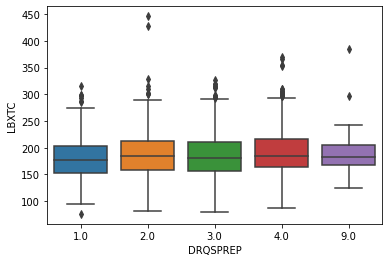

In [16]:
# need to do salt preparation questions

sns.boxplot(x='DRQSPREP', y='LBXTC', data=diet)

The medians slightly increase when salt is used in preparing food.

<AxesSubplot:xlabel='DRQSDIET', ylabel='LBXTC'>

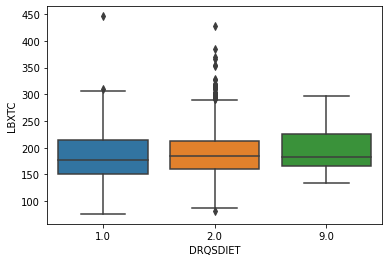

In [21]:
sns.boxplot(x='DRQSDIET', y='LBXTC', data=diet)

Again the boxplots are similar, however more that are not on any special diet have high cholesterol.

In [1]:
# still need to do fish questions

## Dietary Data total nutrition

First I want to look at saturated fats and cholesterol

<AxesSubplot:xlabel='DR1TSFAT', ylabel='LBXTC'>

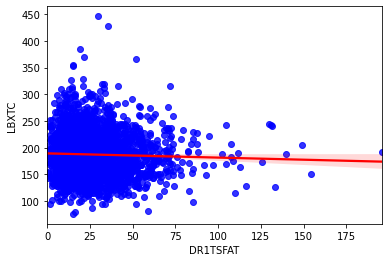

In [26]:
sns.regplot(x='DR1TSFAT',  y='LBXTC', data=diet, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

There could be an upward trend but outliers are effecting the graph.  Regraphing without the outliers.

<AxesSubplot:xlabel='DR1TSFAT', ylabel='LBXTC'>

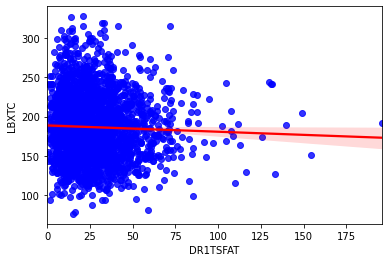

In [29]:
sns.regplot(x='DR1TSFAT',  y='LBXTC', data=diet[diet.LBXTC<350], scatter_kws={"color": "blue"}, line_kws={"color": "red"})

It still doesn't seem to be a trend

<AxesSubplot:xlabel='DR2TSFAT', ylabel='LBXTC'>

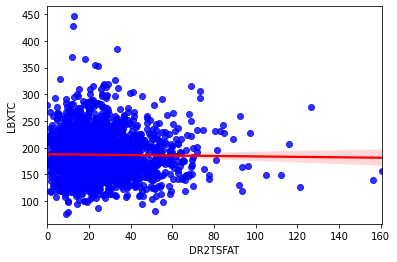

In [27]:
sns.regplot(x='DR2TSFAT',  y='LBXTC', data=diet, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

same

In [ ]:
# need to finish total nutrition

## Alcohol use

In [18]:
alcohol = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/ALQ_J.XPT')
alcohol_merge = alcohol.merge(df,on='SEQN',how='right')

alcohol.ALQ121 asks how often you have drinks in the past 12 months

<AxesSubplot:xlabel='ALQ121', ylabel='LBXTC'>

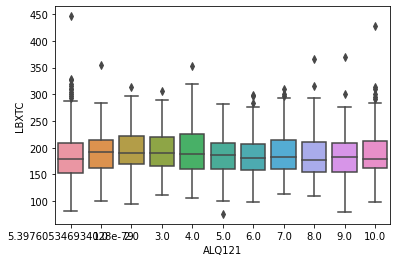

In [19]:
sns.boxplot(x='ALQ121', y='LBXTC', data=alcohol_merge)

ALQ130 asks on days you drink, how many drinks did you have.

I want to use these two questions to approximate the number of alcoholic drinks per year then use a scatterplot comparing that to total cholesterol level.

In [26]:
alcohol_merge.ALQ121.unique()

array([           nan, 5.00000000e+00, 6.00000000e+00, 5.39760535e-79,
       1.00000000e+00, 7.00000000e+00, 9.00000000e+00, 1.00000000e+01,
       3.00000000e+00, 2.00000000e+00, 8.00000000e+00, 4.00000000e+00])

I'm assuming the 5 e -79 means 0

In [27]:
def alcdays(x):
    if np.isnan(x):
        return x
    dic = {0:0,1:365,2:300,3:3.5*52,4:104,5:52,6:2.5*12,7:12,8:9,9:4.5,10:1.5,77:np.nan,99:np.nan}
    if x not in dic.keys():
        return 0
    return dic[x]
    

In [28]:
alcohol_merge['num_drinks']=(alcohol_merge.ALQ121.apply(alcdays))*(alcohol_merge.ALQ130)

<AxesSubplot:xlabel='num_drinks', ylabel='LBXTC'>

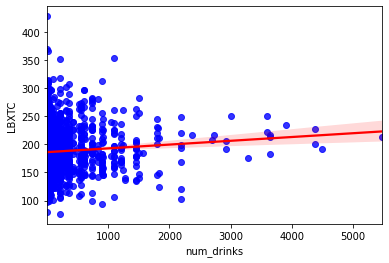

In [29]:
sns.regplot(x='num_drinks',  y='LBXTC', data=alcohol_merge, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

For those that drink large amounts, as the number of drinks goes up the total cholesterol goes up.

## Blood pressure and cholesterol questionaire data

In [9]:
bpc = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/BPQ_J.XPT')
bpc_merged = bpc.merge(df,on='SEQN',how='right')

### BPQ020 -- Ever told you have high blood pressure

<AxesSubplot:xlabel='BPQ020', ylabel='LBXTC'>

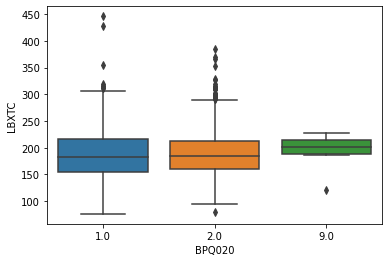

In [10]:
sns.boxplot(x='BPQ020', y='LBXTC', data=bpc_merged)

1 represents yes, 2 represents no, and 9 represents don't know.  For those that have been told they have high blood pressure there are more outliers with higher levels of cholesterol.

Those that have not been told they have high blood pressure didn't have to ask questions regarding taking medication.  Therefore I will fill in those missing values with no, never been told to take medication.

In [11]:
bpc_merged.loc[bpc_merged.BPQ020==2,'BPQ040A']=2

BPQ040A asks if you have ever been told to take medication for high blood pressure while BPQ050A asks are you currently taking medication for high blood pressure.  As BPQ050A is skipped if the response for BPQ040A is no, I'm filling in those missing values with the value for no, 2.

In [12]:
bpc_merged.loc[bpc_merged.BPQ040A==2,'BPQ050A']=2

<AxesSubplot:xlabel='BPQ050A', ylabel='LBXTC'>

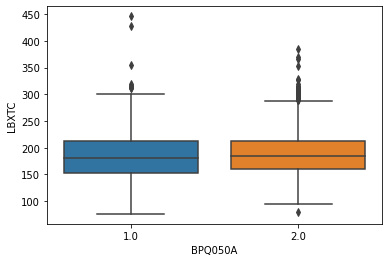

In [13]:
sns.boxplot(x='BPQ050A', y='LBXTC', data=bpc_merged)

The medians are about the same, however many with high cholesterol are not on blood pressure medicine and there are some with extremely high cholesterol that are on blood pressure medication.

## BPQ080 -- told you have high cholesterol

Note to self, do I want to include those on medication for cholesterol or been told you have high cholesterol?

<AxesSubplot:xlabel='BPQ080', ylabel='LBXTC'>

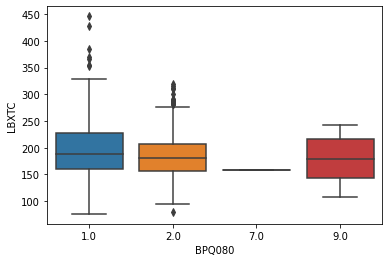

In [14]:
sns.boxplot(x='BPQ080', y='LBXTC', data=bpc_merged)

Those that have been told they have high cholesterol have many more outliers with high cholesterol.

### BPQ100D -- now taking prescription medication for cholesterol.

For those that have not been told to take medication, I first am going to make sure their value for the variable is 2, not taking medication.

In [15]:
bpc_merged.loc[bpc_merged.BPQ090D==2,'BPQ100D']=2

<AxesSubplot:xlabel='BPQ100D', ylabel='LBXTC'>

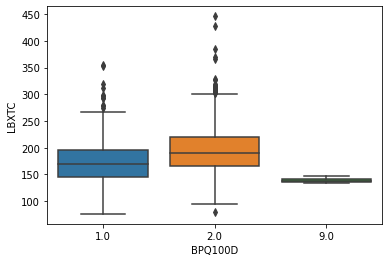

In [16]:
sns.boxplot(x='BPQ100D', y='LBXTC', data=bpc_merged)

The median for cholesterol levels is higher for those not on cholesterol meds than those on cholesterol meds well as those not on meds have many more outliers with higher levels of total cholesterol.

## Cardiovascular health
These are questions regarding pain in chest and arms and shortness of breath.  Now I haven't decided if I want to include these as I'm not sure if a fitness or health app would ask about pain or shortness of breath.

In [17]:
cardio_health = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/CDQ_J.XPT')
ch_merged = cardio_health.merge(df,on='SEQN',how='right')

<AxesSubplot:xlabel='CDQ001', ylabel='LBXTC'>

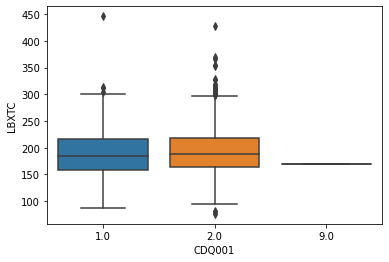

In [18]:

sns.boxplot(x='CDQ001', y='LBXTC', data=ch_merged)

Those that have had pain or discomfort have larger outliers with higher levels of total cholesterol but there is not much difference.

<AxesSubplot:xlabel='CDQ010', ylabel='LBXTC'>

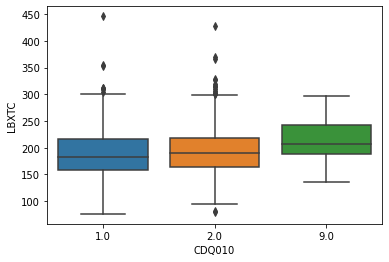

In [19]:

sns.boxplot(x='CDQ010', y='LBXTC', data=ch_merged)

Again, with shortness of breath, not much difference.  Those that respond as don't know have a higher total cholesterol box.

## General health status

In [10]:
health_status = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/HSQ_J.XPT')
hs_merged = health_status.merge(df,on='SEQN',how='right')

<AxesSubplot:xlabel='HSD010', ylabel='LBXTC'>

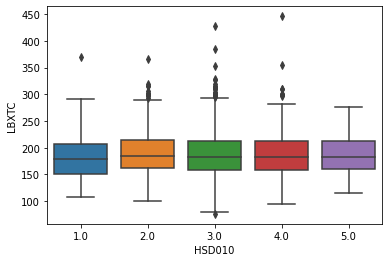

In [11]:

sns.boxplot(x='HSD010', y='LBXTC', data=hs_merged)

Not much difference.  Those with a health status of good, 3, seems to have the most outliers with high cholesterol.

## Diabetes

In [12]:
diabetes = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DIQ_J.XPT')
diabetes_merged = diabetes.merge(df,on='SEQN',how='right')

<AxesSubplot:xlabel='DIQ010', ylabel='LBXTC'>

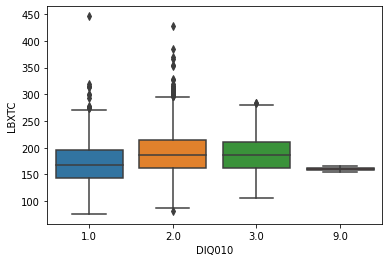

In [13]:
sns.boxplot(x='DIQ010', y='LBXTC', data=diabetes_merged)

Those told they don't have diabetes, 2, on average have higher cholesterol than those with diabetes, 1.  It would be interested to investigate whether those with diabetes are on medication for cholesterol.

There are many more variables in the diabetes dataset, to take a look at what it all includes, see https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DIQ_J.htm

I am skipping them

## Diet behavior and nutrition

In [14]:
diet_behavior = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DBQ_J.XPT')
db_merged = diet_behavior.merge(df,on='SEQN',how='right')

In [ ]:
#do I want to add milk use?

## Question: how healthy is diet? 

I'm not sure if I want to include this as a health app may be tracking diet

<AxesSubplot:xlabel='DBQ700', ylabel='LBXTC'>

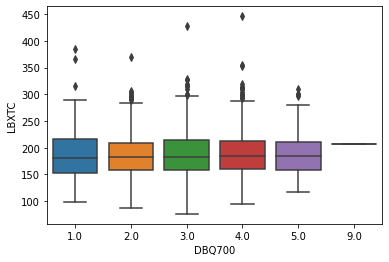

In [15]:

sns.boxplot(x='DBQ700', y='LBXTC', data=db_merged)

As can be seen there isn't much difference.

There are many more variables I am not going to explore.  Information on the variables can be found here: https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DBQ_J.htm

In [1]:
# need to do drug use

## Kidney conditions

In [10]:
kidney = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/KIQ_U_J.XPT')
kidney_merged = kidney.merge(df,on='SEQN',how='right')

In [12]:
kidney_merged.corr()['LBXTC'].sort_values()

KIQ010   -0.088572
KIQ042   -0.063581
KIQ430   -0.058850
KIQ450   -0.057710
KIQ470   -0.043030
KIQ480   -0.022597
KIQ052   -0.020113
KIQ025   -0.018449
KIQ044   -0.017291
KIQ029   -0.015782
KIQ046   -0.010432
SEQN     -0.010141
KIQ050   -0.008313
KIQ005    0.016751
KIQ022    0.028298
KIQ026    0.098902
LBXTC     1.000000
Name: LBXTC, dtype: float64

There isn't much correlation between kidney conditions and cholesterol.

<AxesSubplot:xlabel='KIQ022', ylabel='LBXTC'>

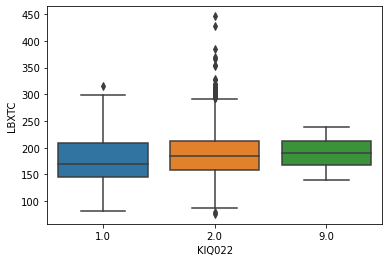

In [11]:

sns.boxplot(x='KIQ022', y='LBXTC', data=kidney_merged)

Those without kidney problems, 2, have slightly higher cholesterol, on average, than those with weak or failing kidneys

## Other medical conditions

In [13]:
mc = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/MCQ_J.XPT')
mc_merged = mc.merge(df,on='SEQN',how='right')